In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
plt.rcParams.update({'image.interpolation': None})
%matplotlib inline

In [132]:
woman = np.asarray(imageio.imread('woman.tif'))
rectangle = np.asarray(imageio.imread('rectangle.tif'))

### (a)

(-0.5, 511.5, 511.5, -0.5)

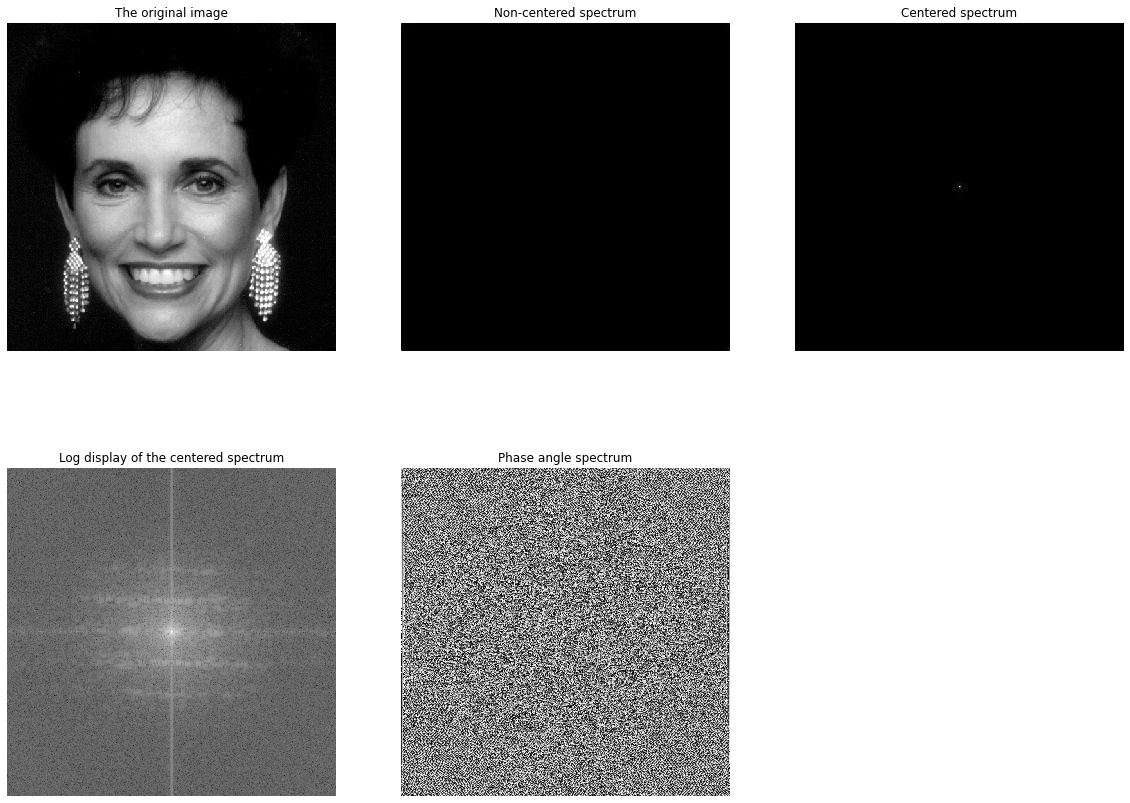

In [123]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.imshow(woman,cmap='gray')
plt.title('The original image')
plt.axis('off')
plt.subplot(2,3,2)
WOMAN_N=np.fft.fft2(woman)
plt.imshow(np.abs(WOMAN_N),cmap='gray')
plt.title('Non-centered spectrum')
plt.axis('off')
plt.subplot(2,3,3)
WOMAN_C=np.fft.fftshift(WOMAN_N)
plt.imshow(np.abs(WOMAN_C),cmap='gray')
plt.title('Centered spectrum')
plt.axis('off')
plt.subplot(2,3,4)
plt.imshow(np.log(1+np.abs(WOMAN_C)),cmap='gray')
plt.title('Log display of the centered spectrum')
plt.axis('off')
plt.subplot(2,3,5)
plt.imshow(np.angle(WOMAN_N),cmap='gray')
plt.title('Phase angle spectrum')
plt.axis('off')

The non_centered spectrum and centered spectrum show the magnitude of each element of the array. In the centered spectrum, the origin of the transform is moved to the center of the frequency rectangle and there is a bright light in its center that represents the (0,0) frequency term or average value of the image. Images usually have a large average value and lots of low frequency information so sectrum images usually have a bright blob of components near the center. The phase angle spectrum shows the phase of signal components as a function of component frequency. Phase describes the relative magnitudes of the signal on the real and imaginary axis. 

(230.0, 280.0, 230.0, 280.0)

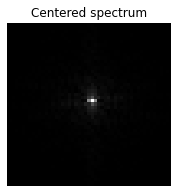

In [230]:
plt.figure(figsize=(3,3))
plt.imshow(np.abs(WOMAN_C),cmap='gray')
plt.title('Centered spectrum')
plt.xlim([230,280])
plt.ylim([230,280])
plt.axis('off')

### (b)

C:\Users\henga\AppData\Local\Temp/ipykernel_9500/616679395.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  woman_zero_phase=np.fft.ifft2(np.abs(WOMAN_new)).astype(float)
C:\Users\henga\AppData\Local\Temp/ipykernel_9500/616679395.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  woman_zero_mag=np.fft.ifft2(WOMAN_new2).astype(float)


(-0.5, 511.5, 511.5, -0.5)

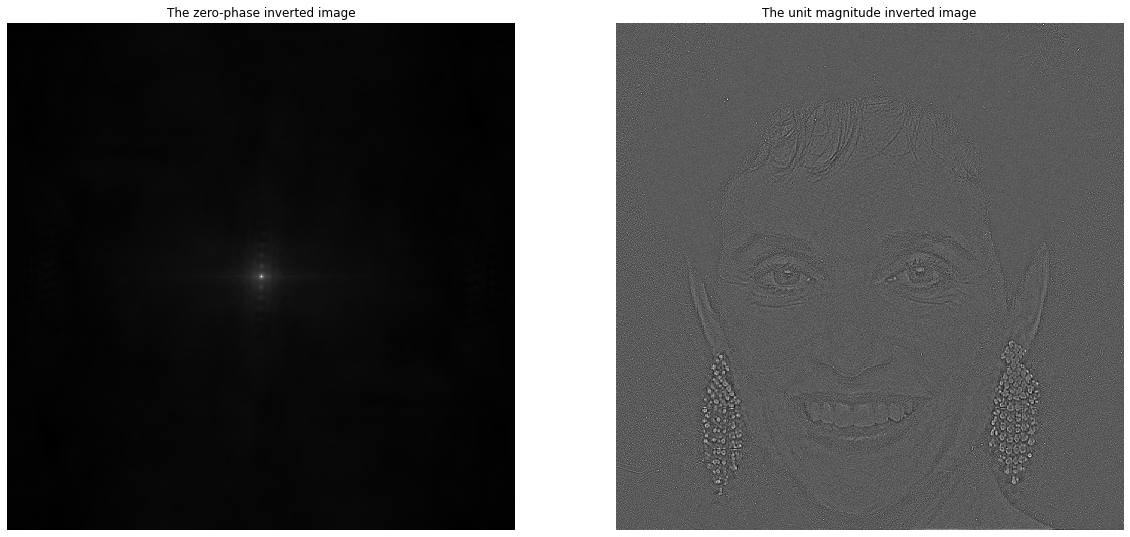

In [29]:
plt.figure(figsize=(20,15))
plt.subplot(1,2,1)

WOMAN_new=np.fft.ifftshift(WOMAN_C)

woman_zero_phase=np.fft.ifft2(np.abs(WOMAN_new)).astype(float)
woman_zero_phase=woman_zero_phase-np.min(woman_zero_phase)
woman_zero_phase=255*(woman_zero_phase/np.max(woman_zero_phase))
woman_zero_phase=np.fft.fftshift(woman_zero_phase)
plt.imshow(woman_zero_phase,cmap='gray')
plt.title('The zero-phase inverted image')
plt.axis('off')

plt.subplot(1,2,2)
WOMAN_new2=np.multiply(1, np.exp(1j * np.angle(WOMAN_new)))
woman_zero_mag=np.fft.ifft2(WOMAN_new2).astype(float)
plt.imshow(woman_zero_mag,cmap='gray')
plt.title('The unit magnitude inverted image')
plt.axis('off')

By observing these images, we can distunguish that the importance of the phase angle in determining shape characteristics in an image. The inverted image by unit magnitude shows the whole of image just the values of intensity differs from the original image. So, it is shown that the phase spectrum carry the most importnt information of image and it plays a main role for reconstructing an image. On the other hand, the inverted image with zero phase illustrated that it just contains only intensity information with the dc term being the most dominant. There is no shape information in the image because the phase was set to zero. Therefore, the magnitude has intensity information of image but the the phase has the information related to shape of image. 

### (C)

Text(0.5, 1.0, 'Log display of the centered spectrum of WOMAN1024')

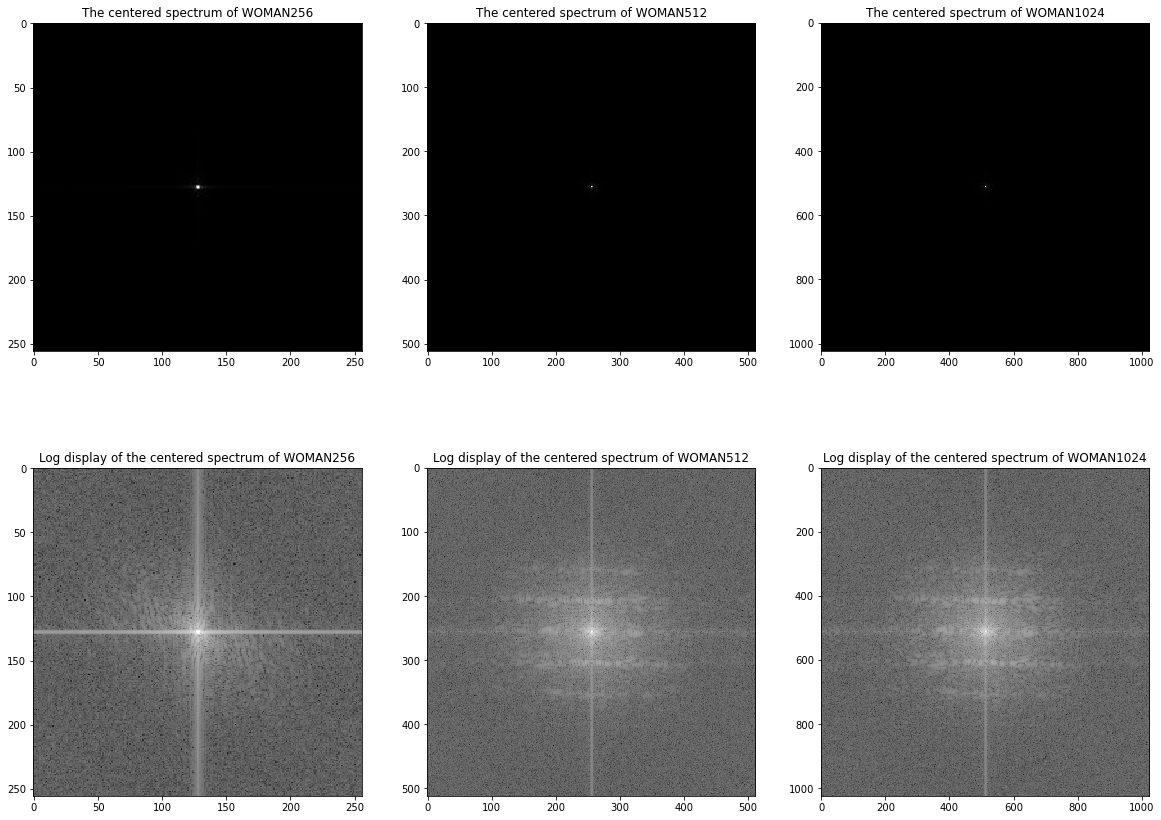

In [133]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
WOMAN256_1=np.fft.fft2(woman, s=[256,256])
WOMAN256=np.fft.fftshift(WOMAN256_1)
plt.imshow(np.abs(WOMAN256),cmap='gray')
plt.title('The centered spectrum of WOMAN256')

plt.subplot(2,3,2)
WOMAN512_1=np.fft.fft2(woman)
WOMAN512=np.fft.fftshift(WOMAN512_1)
plt.imshow(np.abs(WOMAN512),cmap='gray')
plt.title('The centered spectrum of WOMAN512')

plt.subplot(2,3,3)
WOMAN1024_1=np.fft.fft2(woman, s=[1024,1024])
WOMAN1024=np.fft.fftshift(WOMAN1024_1)
plt.imshow(np.abs(WOMAN1024),cmap='gray')
plt.title('The centered spectrum of WOMAN1024')

plt.subplot(2,3,4)
plt.imshow(np.log(1+np.abs(WOMAN256)),cmap='gray')
plt.title('Log display of the centered spectrum of WOMAN256')

plt.subplot(2,3,5)
plt.imshow(np.log(1+np.abs(WOMAN512)),cmap='gray')
plt.title('Log display of the centered spectrum of WOMAN512')

plt.subplot(2,3,6)
plt.imshow(np.log(1+np.abs(WOMAN1024)),cmap='gray')
plt.title('Log display of the centered spectrum of WOMAN1024')


The spectrums of WOMAN256 show that the image is cropped for transformation, thus, the log spectrum appears more focused and the bright dot of the centered spectrum is bigger than others. 
The spectrums of WOMAN1024 show that for providing the bigger image in size in FFT, the image is padded with zero. The log spectrum indicates the zero padding around the image and the bright dot of the centered spectrum is smaller than the others.

### (d)

C:\Users\henga\AppData\Local\Temp/ipykernel_9500/1422452601.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  woman256=np.fft.ifft2(WOMAN256_new).astype(float)
C:\Users\henga\AppData\Local\Temp/ipykernel_9500/1422452601.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  woman1024=np.fft.ifft2(WOMAN1024_new).astype(float)


Text(0.5, 1.0, 'The inverted image of woman1024')

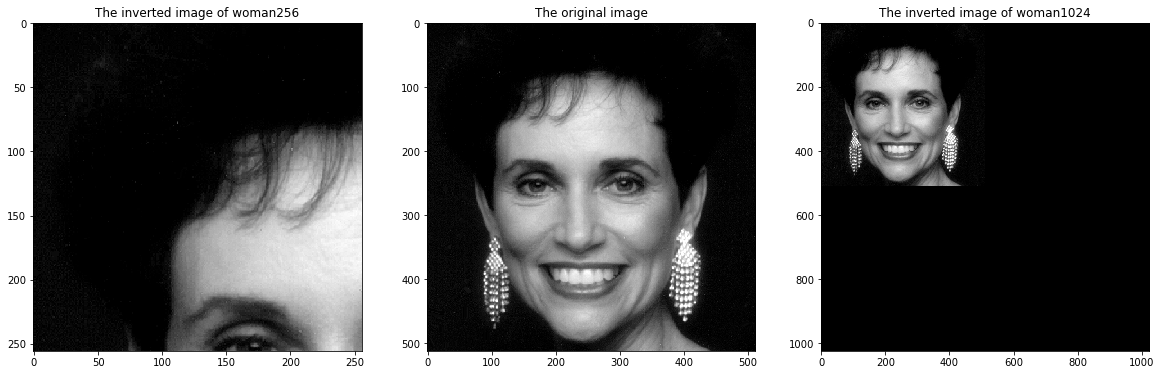

In [95]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
WOMAN256_new=np.fft.ifftshift(WOMAN256)
woman256=np.fft.ifft2(WOMAN256_new).astype(float)
plt.imshow(woman256,cmap='gray')
plt.title('The inverted image of woman256')


plt.subplot(1,3,2)
plt.imshow(woman,cmap='gray')
plt.title('The original image')


plt.subplot(1,3,3)
WOMAN1024_new=np.fft.ifftshift(WOMAN1024)
woman1024=np.fft.ifft2(WOMAN1024_new).astype(float)
plt.imshow(woman1024,cmap='gray')
plt.title('The inverted image of woman1024')


As mentioned in the previous part, by choosing the size for the output of FFT, if the chosen size is less than the original size of the image, it crops the image, and if the size is bigger than that it applies zero-padding. Here, the inverted images show these facts clearly. The inverted image from the image with size 256 which has smaller than the original size, the image is focused and cropped the part of the image in the size of 256x256. But for the inverted image in the size of 1024 which is bigger than the original size, the image occupied its size and the rest is padded with zeros.

### (e)

C:\Users\henga\AppData\Local\Temp/ipykernel_9500/2712601223.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  woman256_512=np.fft.ifft2(WOMAN256_new, s=[512,512]).astype(float)
C:\Users\henga\AppData\Local\Temp/ipykernel_9500/2712601223.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  woman1024_512=np.fft.ifft2(WOMAN1024_new, s=[512,512]).astype(float)


Text(0.5, 1.0, 'The inverted image of woman1024 in size 512')

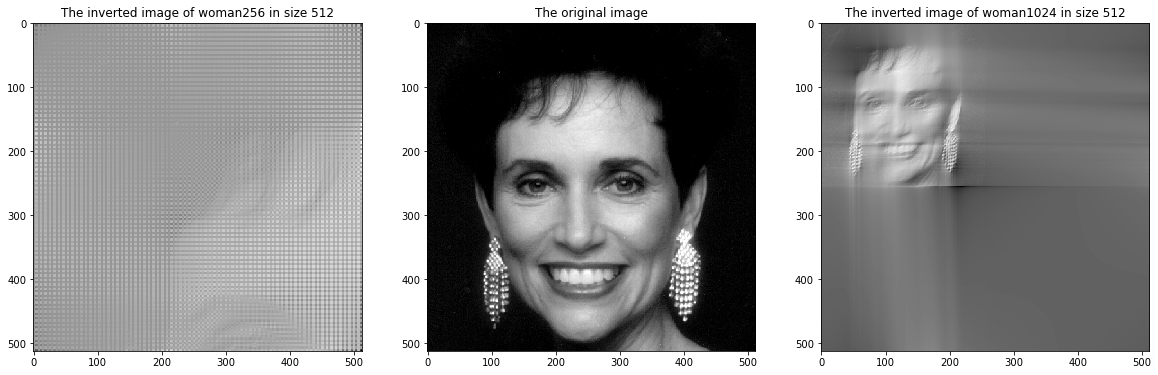

In [96]:
plt.figure(figsize=(20,15))
plt.subplot(1,3,1)
WOMAN256_new=np.fft.ifftshift(WOMAN256)
woman256_512=np.fft.ifft2(WOMAN256_new, s=[512,512]).astype(float)
plt.imshow(woman256_512,cmap='gray')
plt.title('The inverted image of woman256 in size 512')

plt.subplot(1,3,2)
plt.imshow(woman,cmap='gray')
plt.title('The original image')

plt.subplot(1,3,3)
WOMAN1024_new=np.fft.ifftshift(WOMAN1024)
woman1024_512=np.fft.ifft2(WOMAN1024_new, s=[512,512]).astype(float)
plt.imshow(woman1024_512,cmap='gray')
plt.title('The inverted image of woman1024 in size 512')

In first image, which is the inverted image from 256 to 512, the ifft2 is used zero padding for this tranforamtion because if the output size in bigger than the input size, it uses zero padding. So, the result looks different than the previos part. The third image which is the inverted image from 1024 to 512, the ifft2 is cropped the image because the size of output is smaller than the input.

### (f)

C:\Users\henga\AppData\Local\Temp/ipykernel_9500/532141447.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  rectangle=np.fft.ifft2(RECTANGLE_new).astype(float)
C:\Users\henga\AppData\Local\Temp/ipykernel_9500/532141447.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  woman=np.fft.ifft2(WOMAN_new).astype(float)


(-0.5, 1023.5, 1023.5, -0.5)

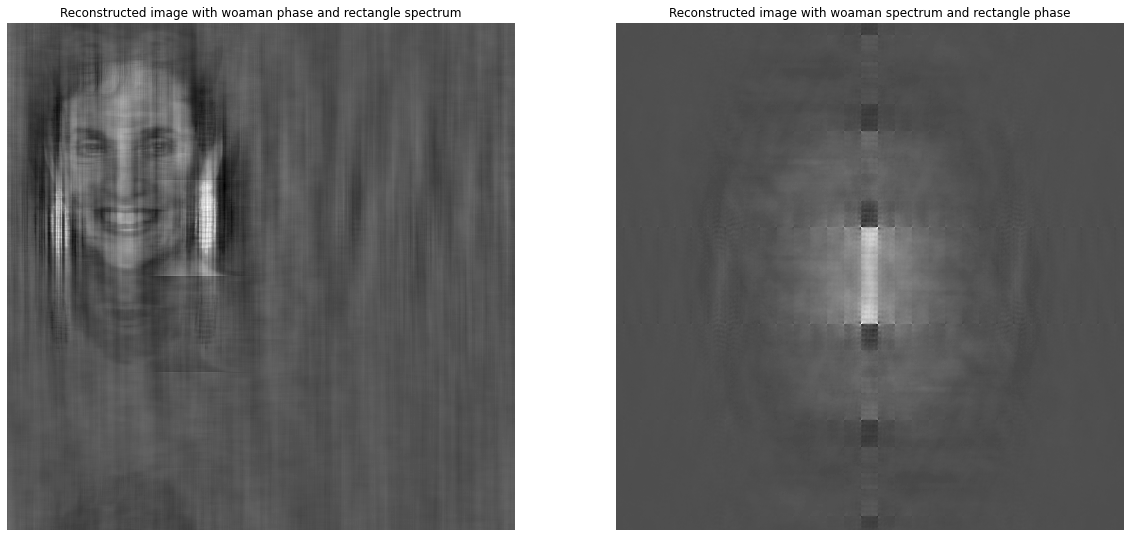

In [134]:
RECTANGLE=np.fft.fft2(rectangle)
RECTANGLE=np.fft.fftshift(RECTANGLE)

plt.figure(figsize=(20,15))

RECTANGLE=np.fft.ifftshift(RECTANGLE)
WOMAN1024=np.fft.ifftshift(WOMAN1024)

plt.subplot(1,2,1)
RECTANGLE_new=np.multiply(np.abs(RECTANGLE), np.exp(1j * np.angle(WOMAN1024)))
rectangle=np.fft.ifft2(RECTANGLE_new).astype(float)
plt.imshow(rectangle,cmap='gray')
plt.title('Reconstructed image with woaman phase and rectangle spectrum')
plt.axis('off')

plt.subplot(1,2,2)
WOMAN_new=np.multiply(np.abs(WOMAN1024), np.exp(1j * np.angle(RECTANGLE)))
woman=np.fft.ifft2(WOMAN_new).astype(float)
plt.imshow(woman,cmap='gray')
plt.title('Reconstructed image with woaman spectrum and rectangle phase')
plt.axis('off')

For replicating the figure 4.26(e) and 4.26(f), the inverse FFT is applied with usage of spectrum and phase of inverse rectangle in frequency domain (RECTANGLE) and the spectrum and phase of inverse woman in size 1024x1024 in frequency domain. The size of rectangle is 1024, so phase and spectrum should be in the same size, thus the WOMAN1024 is used. The rectangle image could not resize to 512 because the bright rectangle would be placed in the edge (right bottem corner) and could not replicate the desired images. In first image, the spectrum of RECTANGLE and phase of WOMAN1024 is used and in the second one, the the spectrum of WOMAN1024 and phase of RECTANGLE is used.